In [15]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
from sodapy import Socrata
client = Socrata("data.virginia.gov",None)

In [24]:
data = client.get("28k2-x2rj",limit=1300000)
df2= pd.DataFrame.from_records(data)

In [25]:
df2.head()

,administration_date,fips,locality,health_district,facility_type,vaccine_manufacturer,dose_number,vaccine_doses_administered
0,2023-02-22T00:00:00.000,51001,Accomack,Eastern Shore,Other Community Health Providers,Moderna BV,3,2
1,2023-02-22T00:00:00.000,51001,Accomack,Eastern Shore,Other Community Health Providers,Pfizer BV 12+,3,1
2,2023-02-22T00:00:00.000,51001,Accomack,Eastern Shore,Other Community Health Providers,Pfizer 0-4,1,1
3,2023-02-22T00:00:00.000,51001,Accomack,Eastern Shore,Other Community Health Providers,Pfizer 5-11,2,1
4,2023-02-22T00:00:00.000,51001,Accomack,Eastern Shore,Other Community Health Providers,Pfizer 5-11,1,1


In [30]:
df2.shape

(1203735, 8)

In [41]:
df2['administration_date'] =  pd.to_datetime(df2['administration_date'])
df2['locality'] = pd.Categorical(df2.locality)
df2['health_district'] = pd.Categorical(df2.health_district)

In [42]:
df2['facility_type'] = pd.Categorical(df2.facility_type)
df2['vaccine_manufacturer'] = pd.Categorical(df2.vaccine_manufacturer)
df2['dose_number']=df2['dose_number'].astype(str).astype(int)
df2['vaccine_doses_administered']=df2['vaccine_doses_administered'].astype(str).astype(int)

In [43]:
df2.dtypes

administration_date           datetime64[ns]
fips                                  object
locality                            category
health_district                     category
facility_type                       category
vaccine_manufacturer                category
dose_number                            int64
vaccine_doses_administered             int64
dtype: object

In [32]:
# For each health district in Virginia, what proportion of all 1st doses were of the Pfizer vaccine?

In [44]:
df_new = df2[df2["dose_number"] == 1]

Text(0.5, 1.0, 'Proportion of all 1st doses in each Health District')

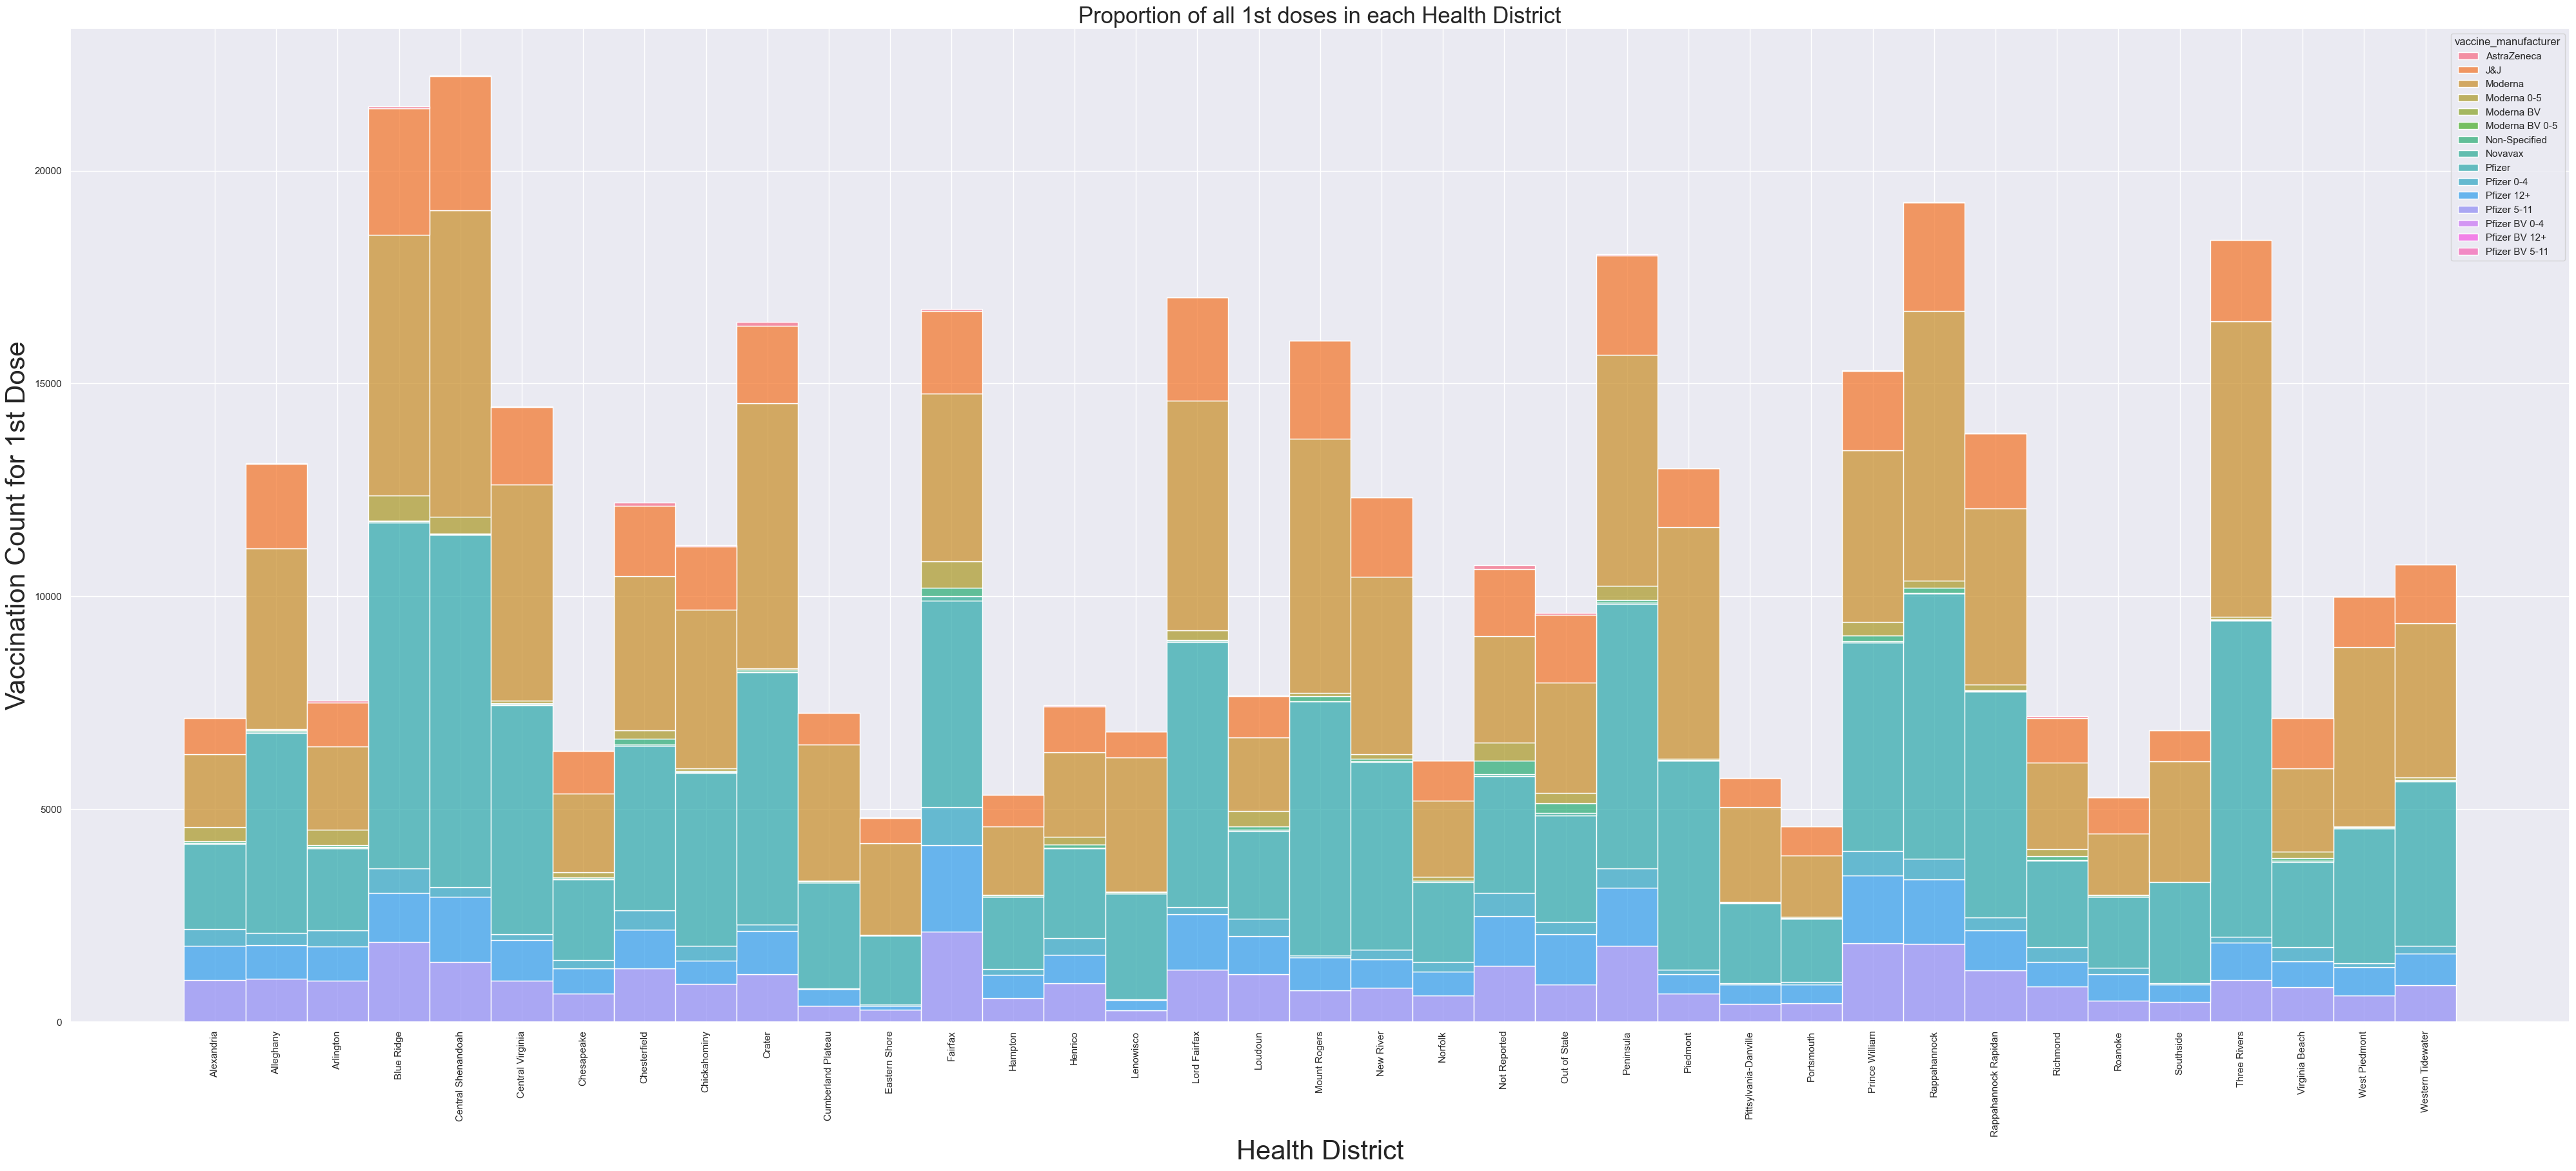

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

ax=sns.histplot(binwidth=1, x="health_district", hue="vaccine_manufacturer", data=df_new, stat="count", multiple="stack")
sns.set(rc={'figure.figsize':(40,20)})
plt.xticks(rotation=90)
ax.set_xlabel("Health District", fontsize = 30)
ax.set_ylabel("Vaccination Count for 1st Dose", fontsize = 30)
ax.set_title("Proportion of all 1st doses in each Health District",fontsize=25)